# Topic 1: Exercise 1

#### Importing the data

In [47]:
library(dplyr)
library(stringr)
library(foreach)
library(ggplot2)
library(reshape2)

In [4]:
d <- read.csv('../../datasets/Colleges.csv')

In [5]:
head(d)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


## 1- Identify the type of all variables

In [ ]:
foreach (col = d, nms = colnames(d)) %do% {
    print(str_interp("${nms} is of type ${typeof(col)}"))
}

#### represented as R type - numerical/categorical 

- X is of type character - categorical (id)
- Private is of type character - categorical binary
- Apps is of type integer - numerical discrete
- Accept is of type integer - numerical discrete
- Enroll is of type integer - numerical discrete
- Top10perc is of type integer - numerical discrete
- Top25perc is of type integer - numerical discrete
- F.Undergrad is of type integer - numerical discrete
- P.Undergrad is of type integer - numerical discrete
- Outstate is of type integer - numerical discrete
- Room.Board is of type integer - numerical discrete
- Books is of type integer - numerical discrete
- Personal is of type integer - numerical discrete
- PhD is of type integer - numerical discrete
- Terminal is of type integer - numerical discrete
- S.F.Ratio is of type double - numerical continuous
- perc.alumni is of type integer - numerical discrete
- Expend is of type integer - numerical discrete
- Grad.Rate is of type integer - numerical discrete

## 2- Perform a visual analysis of each quantitative variable. Then do so considering the variable *private*. Describe each plot.

### Histograms

In [ ]:
# setting plot sizes
options(repr.plot.width = 14, repr.plot.height = 8)

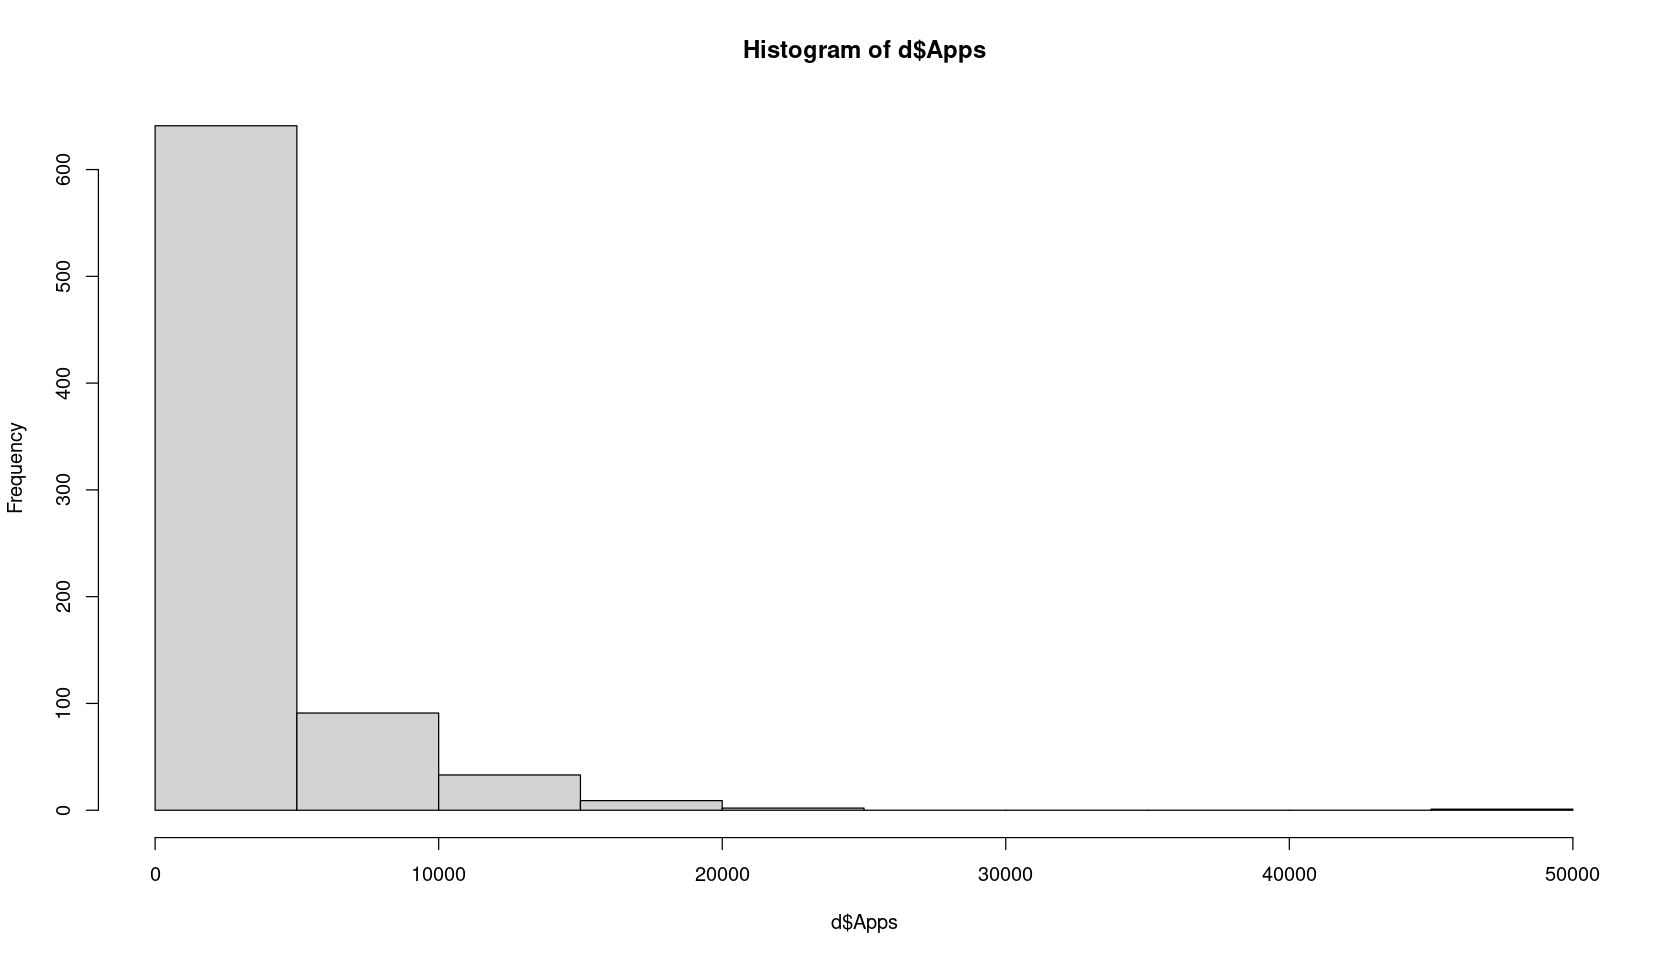

In [9]:
# Apps
hist(d$Apps)

- Large right tail, higher frequency
- Long left tail
- Significantly more elements in the right tail
- Resembles gamma distribution

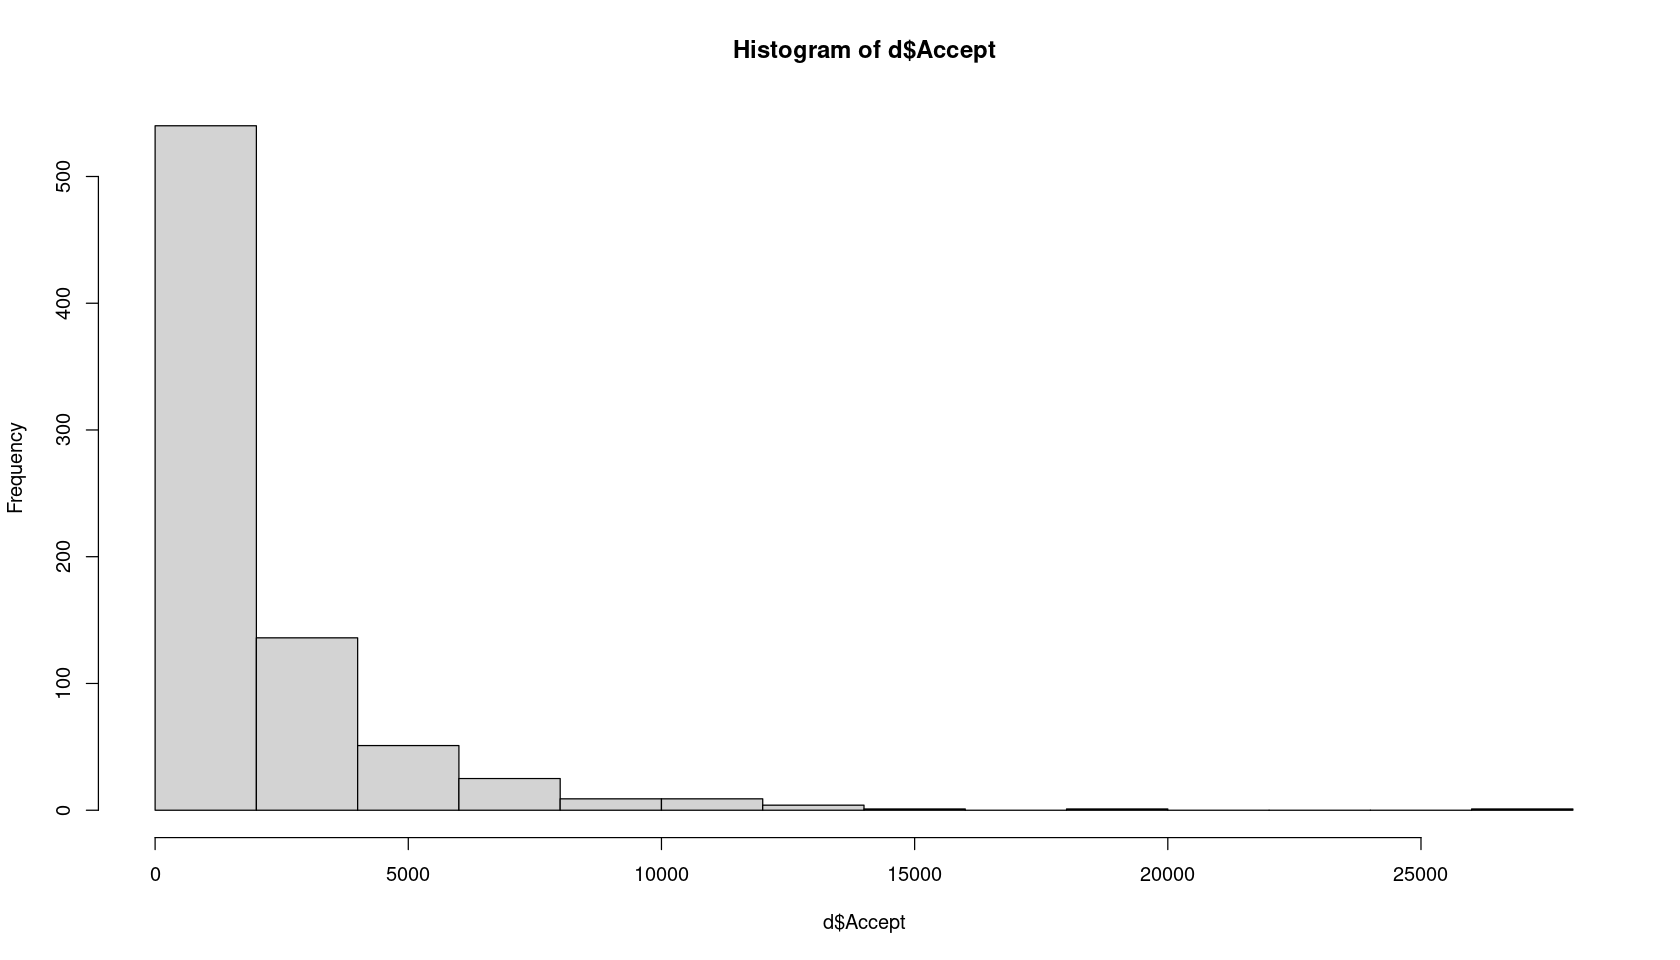

In [10]:
# Accept
hist(d$Accept)

Pretty much the same as Apps but with a significantly shorter left tail. Probably because those students being accepted are just a subset of those that apply.

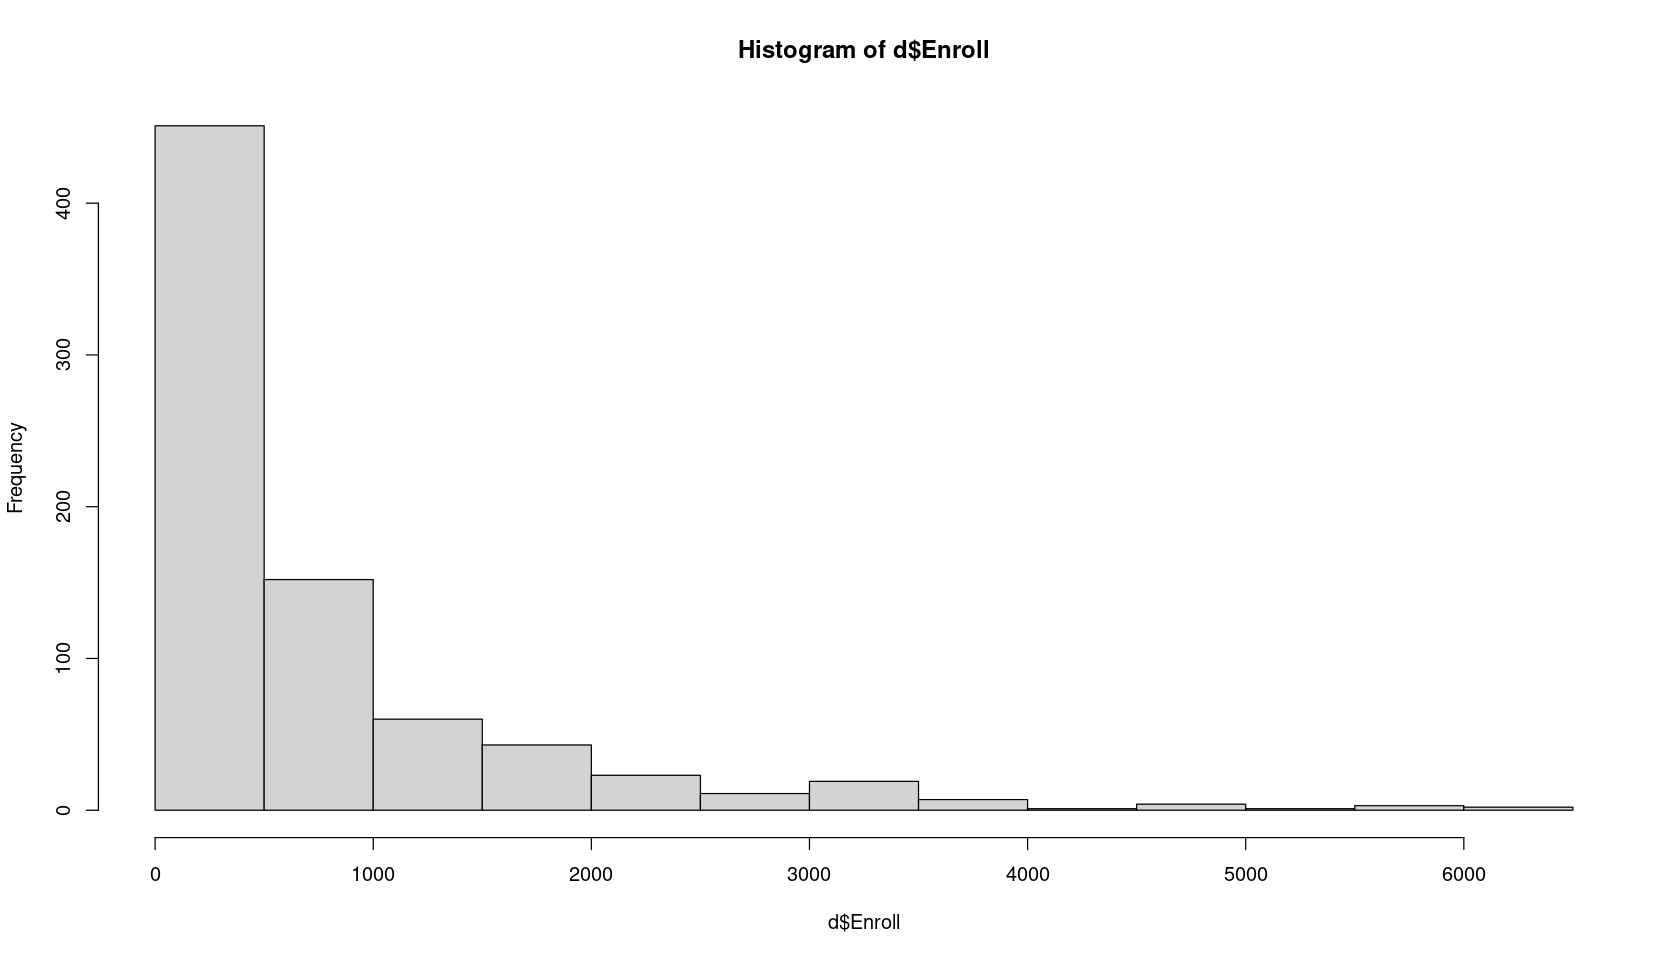

In [11]:
# Enroll
hist(d$Enroll)

Enroll also tells the same story, but in this case our left tail is even smaller than the accept left tail. Maybe because significantly less students enroll than those that just get accepted

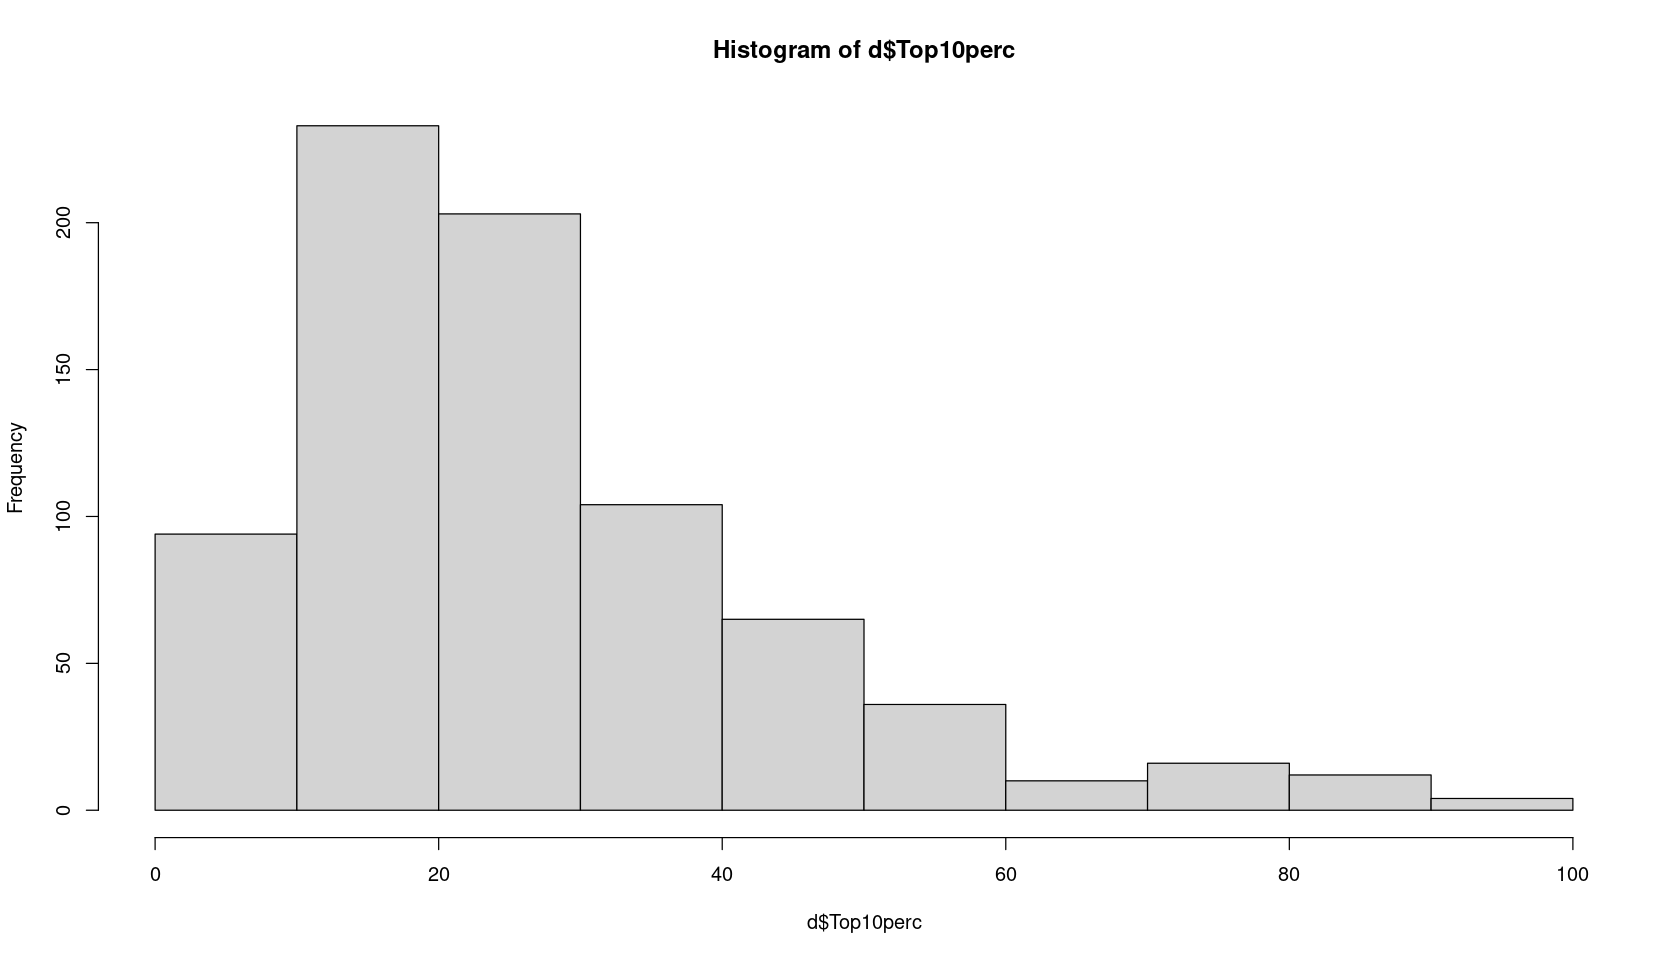

In [12]:
# Top10perc
hist(d$Top10perc)

- long left tail
- short but high frequency right tail
- Resembles gaussian distribution
- most elements concentrate around 20

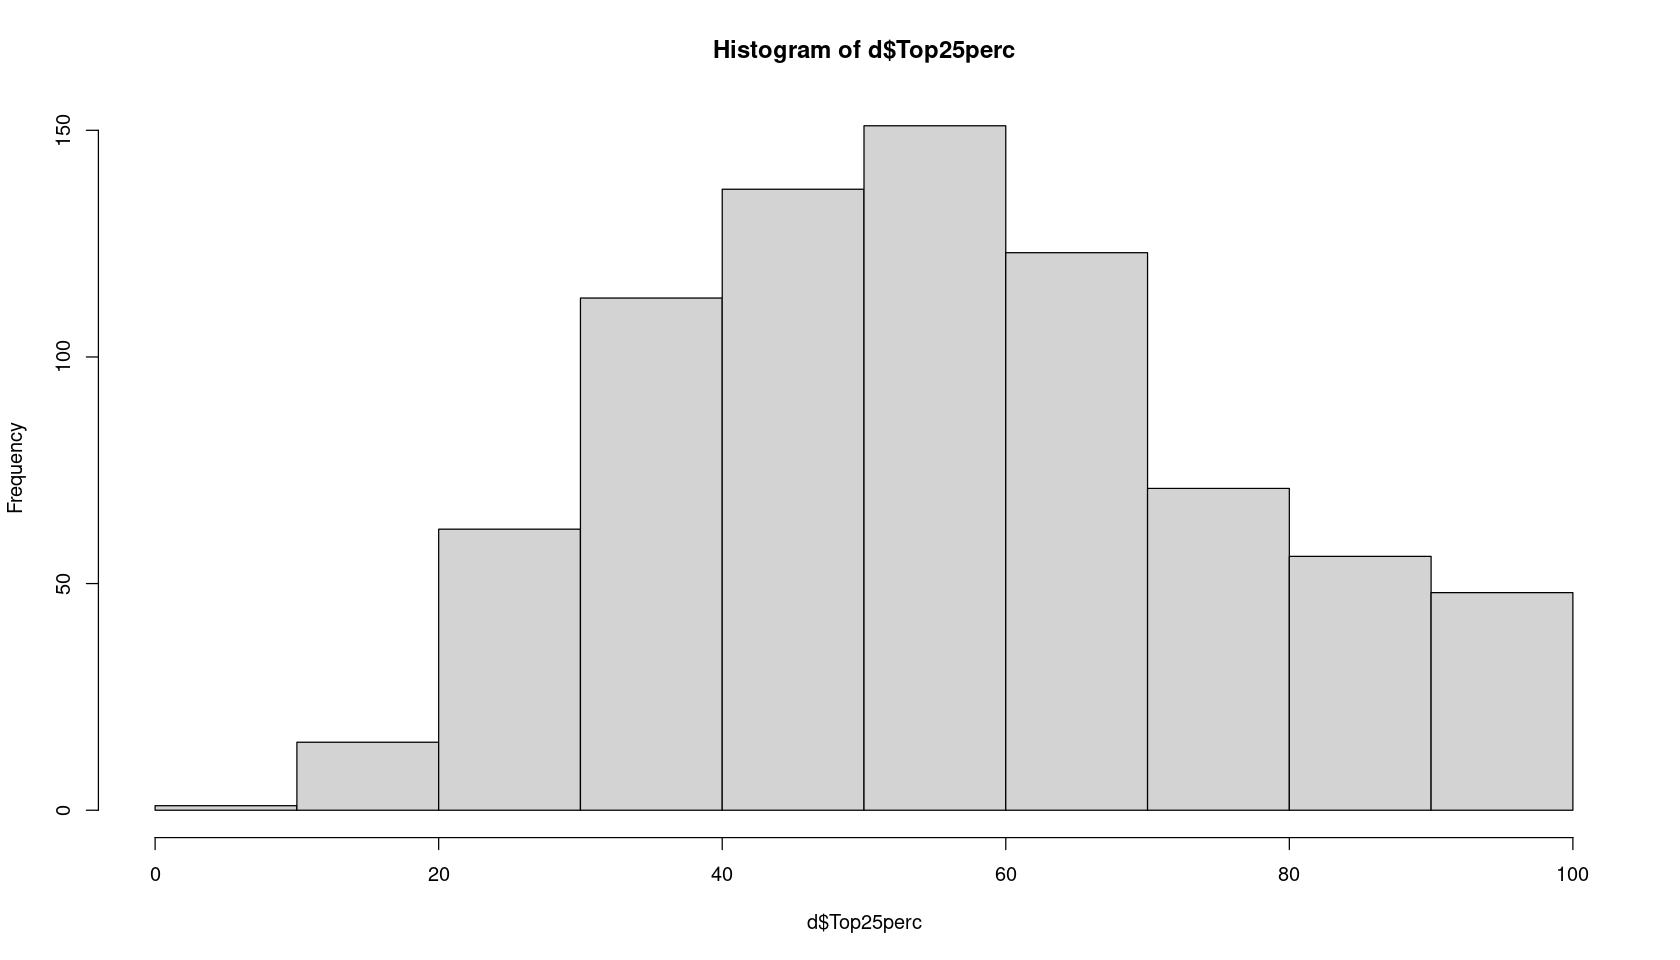

In [13]:
# Top25perc
hist(d$Top25perc)

- mean is probably between 40-60
- small right tail
- large left tail
- Resembles gaussian distribution

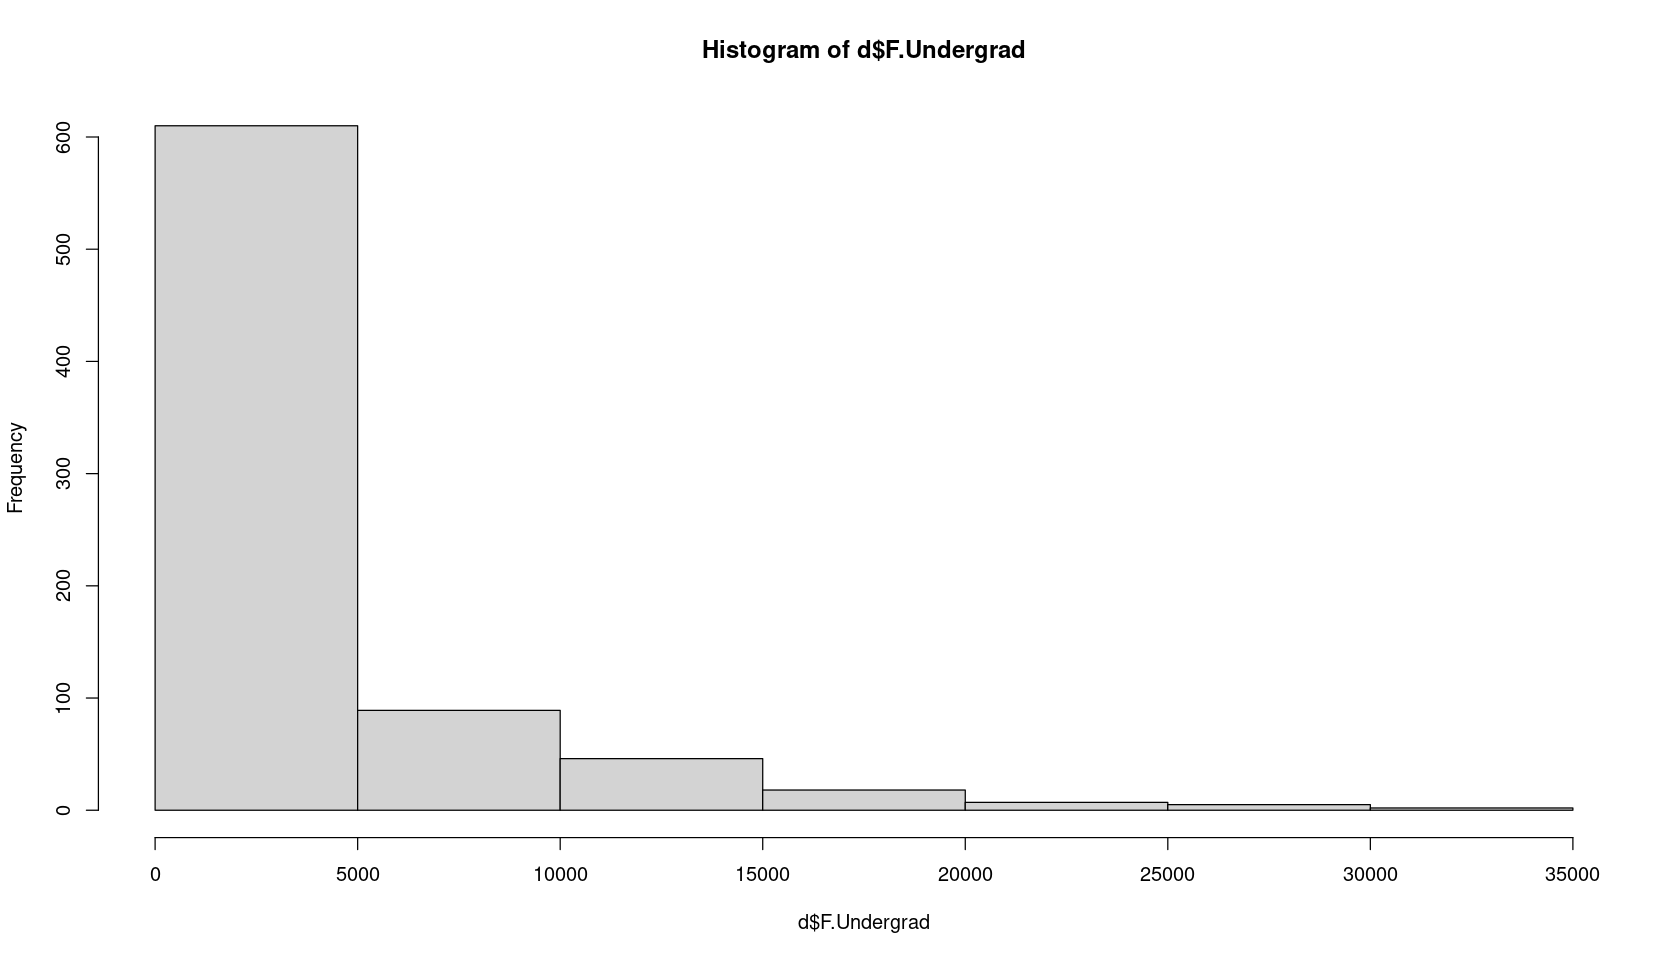

In [14]:
# F.Undergrad
hist(d$F.Undergrad)

- long left tail
- most of the universities between 0-5000
- significantly less data at 5000+
- Resembles gamma distribution

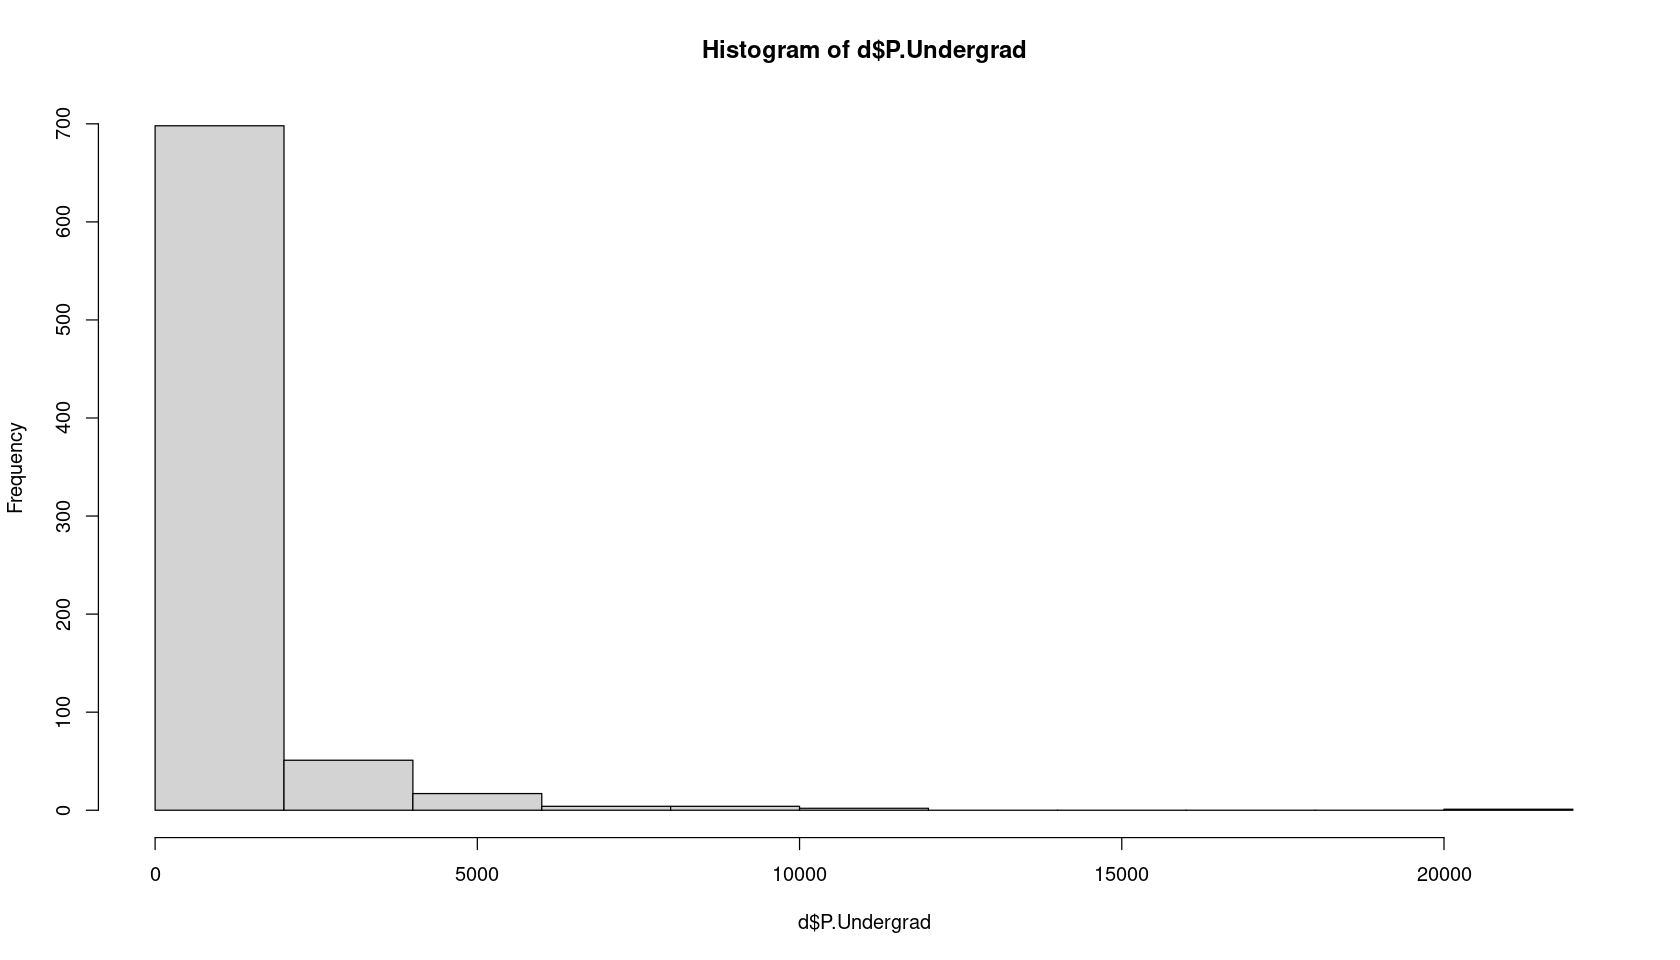

In [15]:
# P.Undergrad
hist(d$P.Undergrad)

Similar to F.Undergrad we have a quite long right tail, this one resembles Apps more, and similar to F.Undergrad we also have a large frequency right tail and possibly more than 90% of the data between 0 and 5000

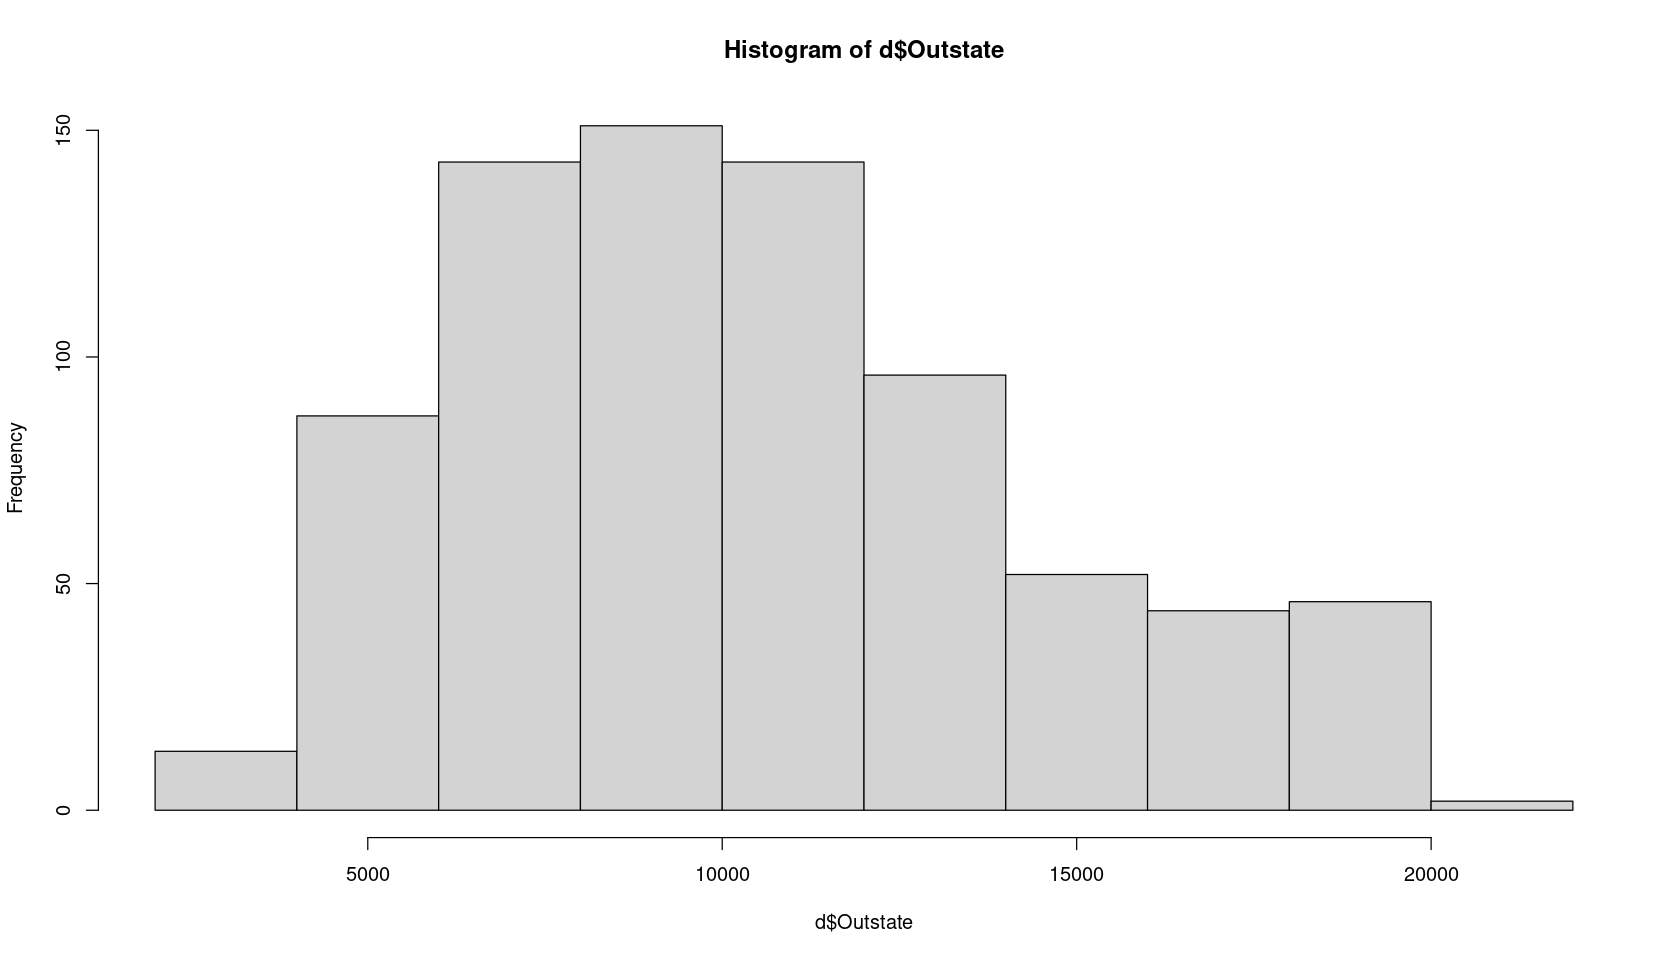

In [16]:
# Outstate
hist(d$Outstate)

- Mean around 10000
- relatively heavy left tail but not very long
- light right tail
- resembles gaussian distribution

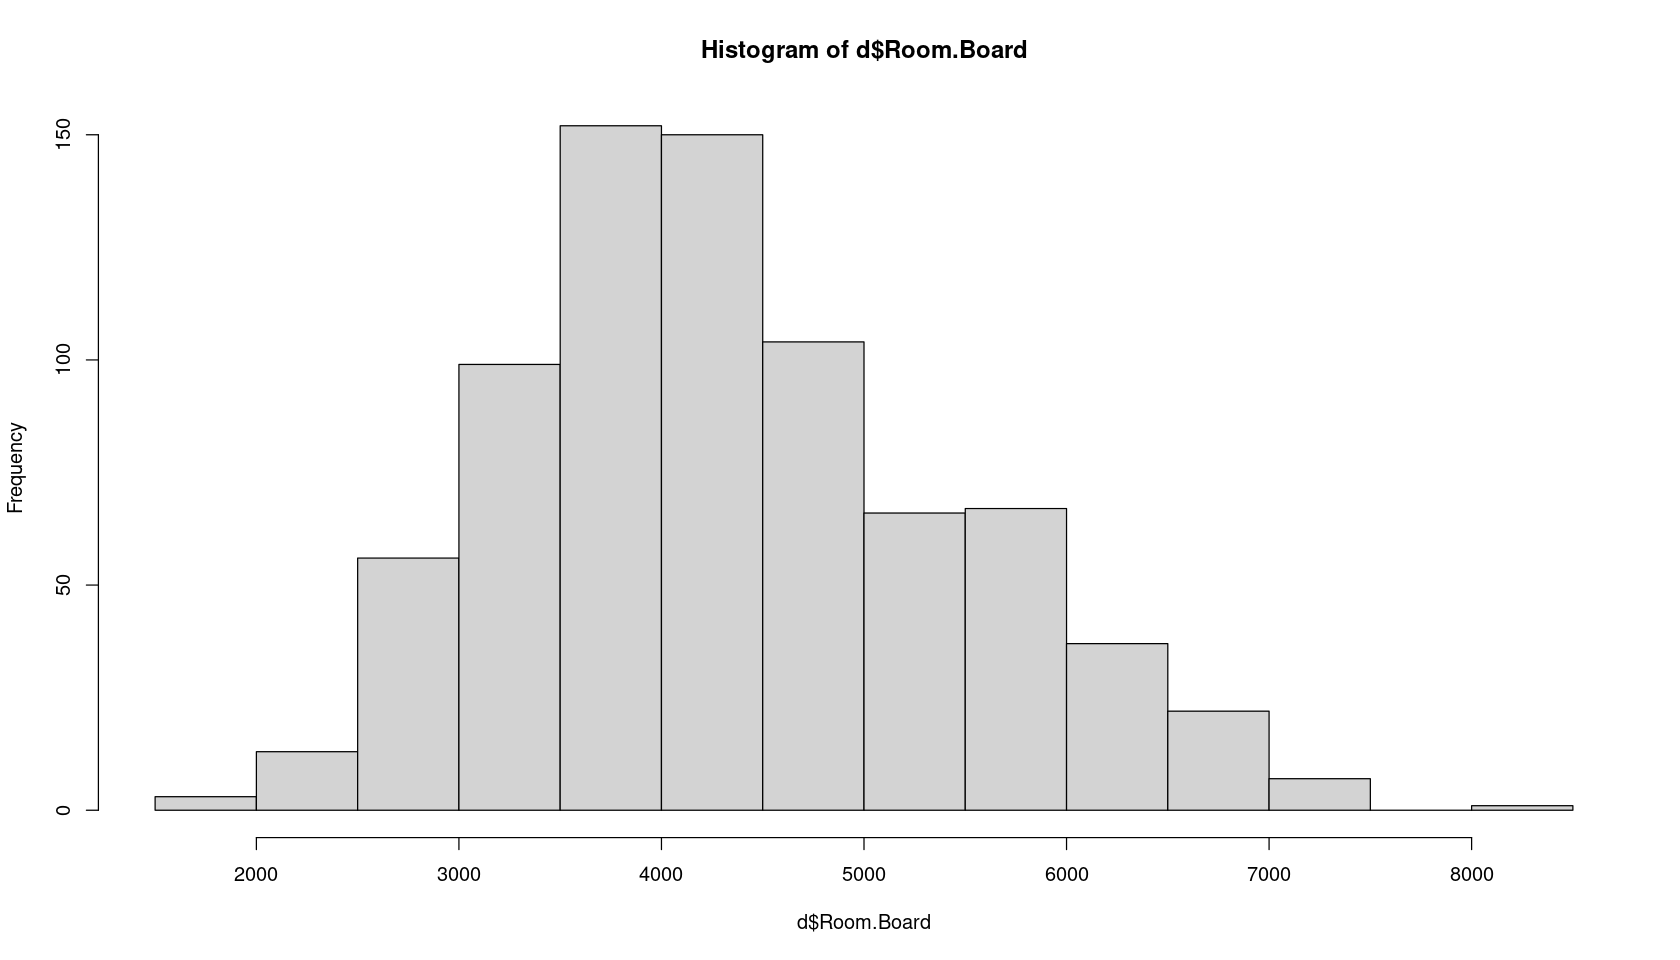

In [17]:
# Room.Board
hist(d$Room.Board)

- resembles a slightly right skewed gaussian distribution
- relatively long left tail
- mean between 3500-4500

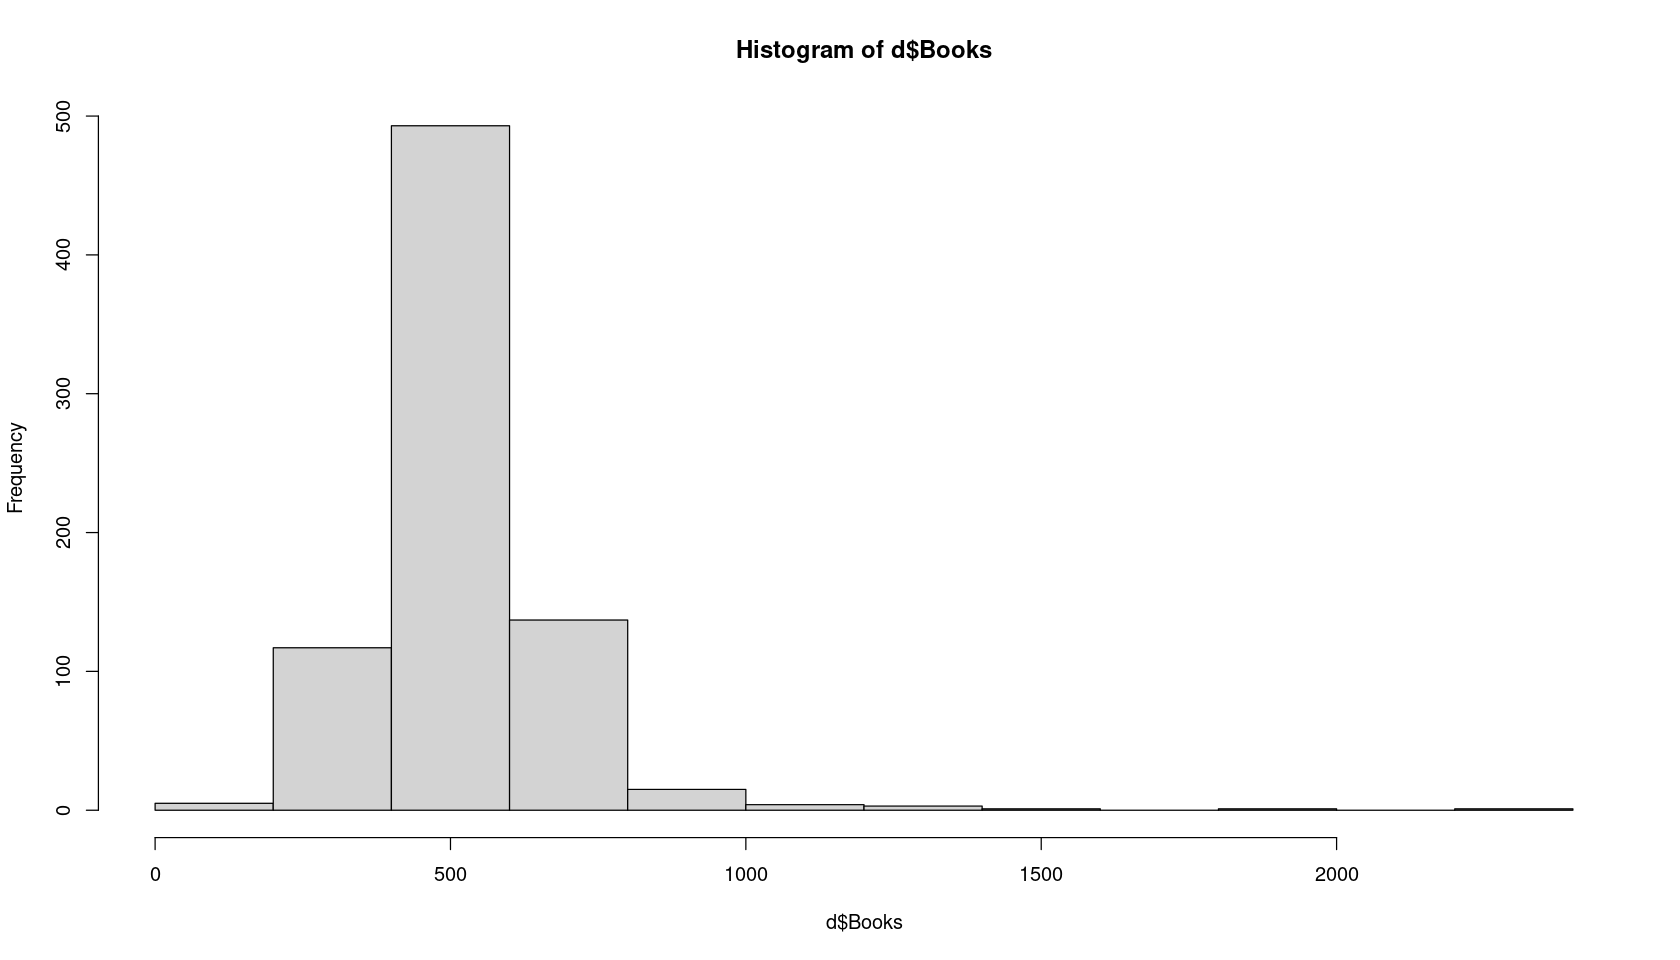

In [18]:
# Books
hist(d$Books)

- long left tail
- very right skewed
- mean most probably around 500
- nearly all values between 400-750

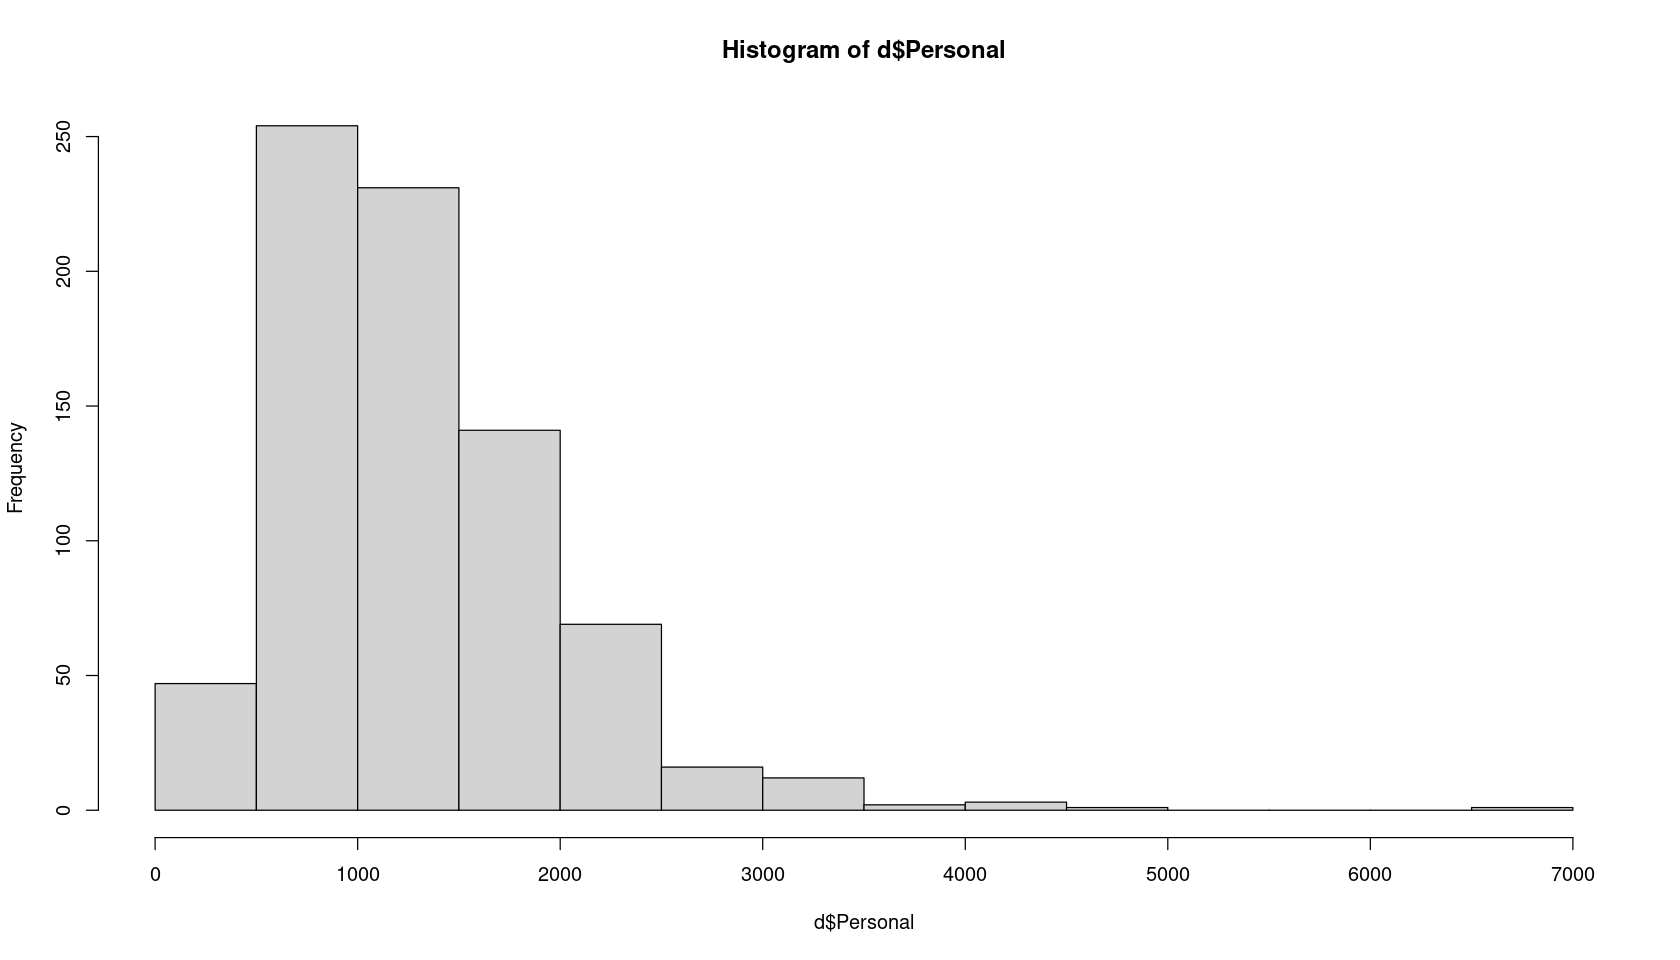

In [21]:
# Personal
hist(d$Personal)

- very right skewed
- long left tail
- resembles a gamma distribution

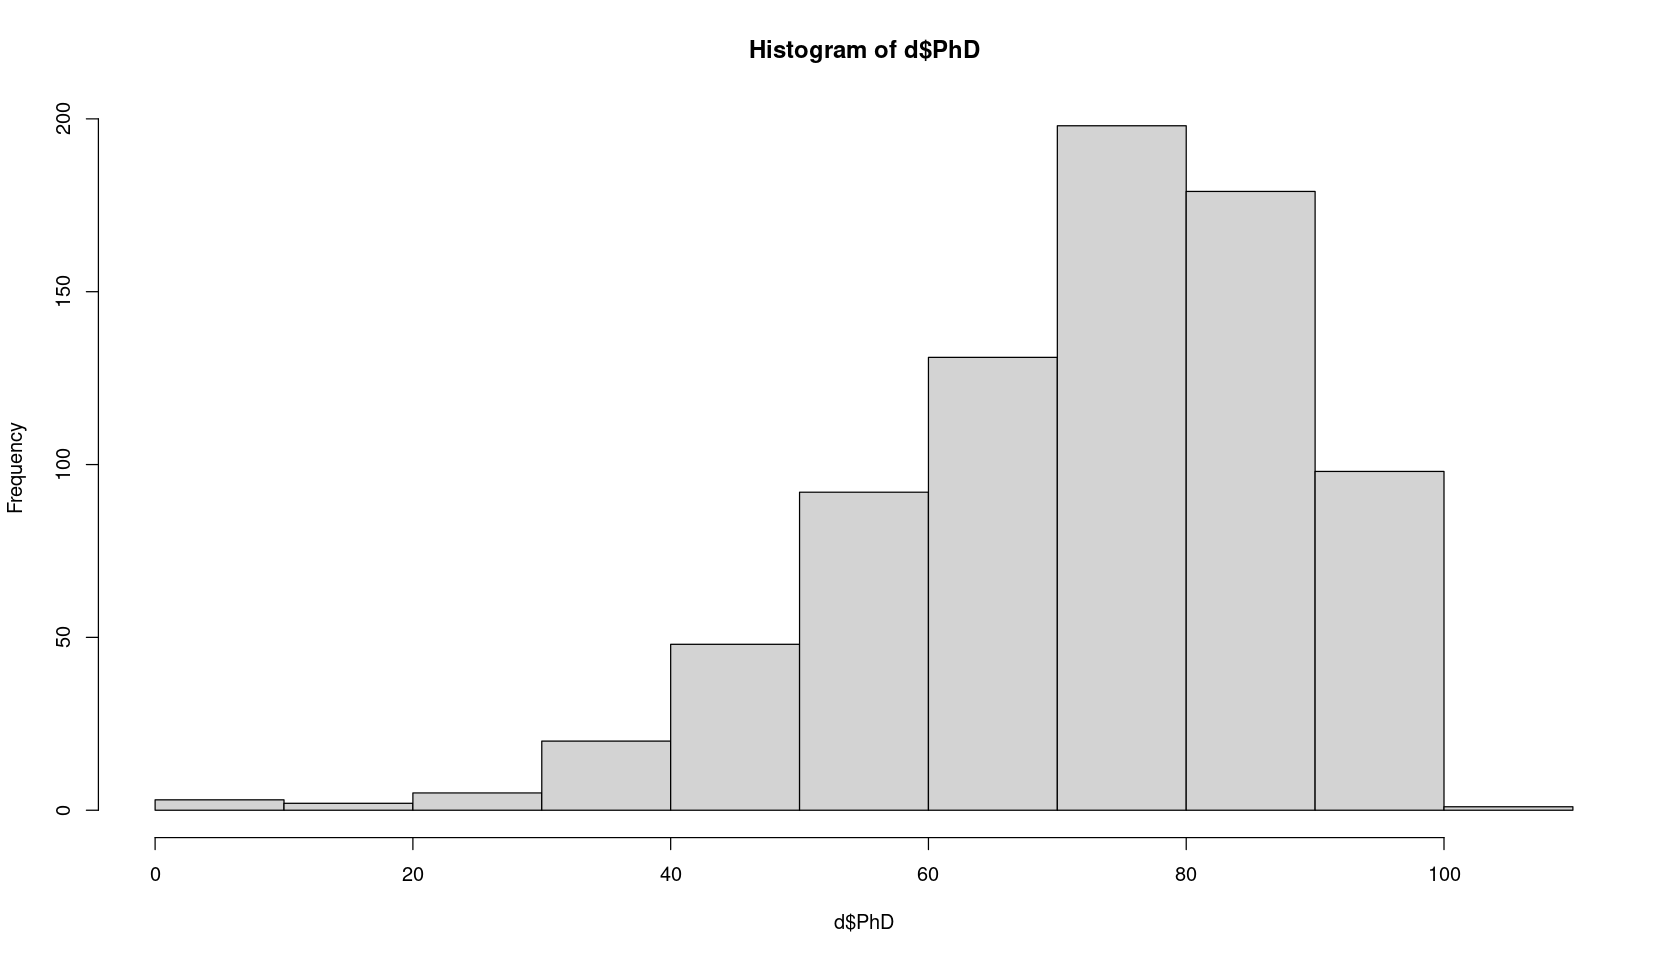

In [22]:
# PhD
hist(d$PhD)

- long and light right tail
- very left skewed

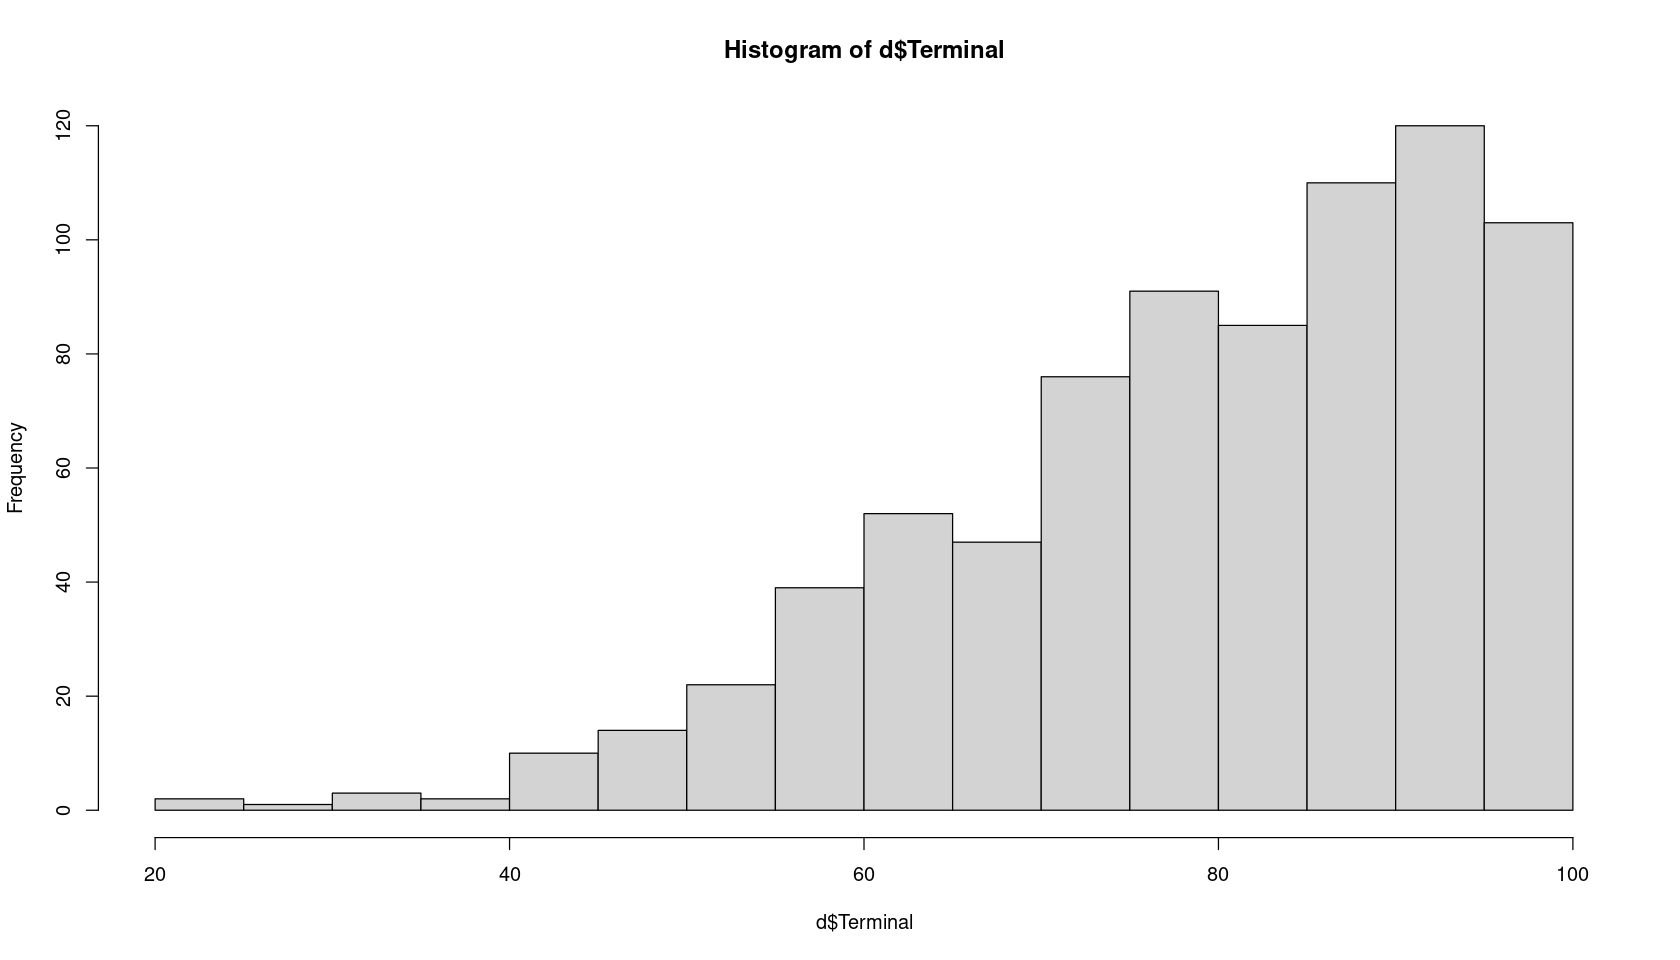

In [23]:
# Terminal
hist(d$Terminal)

- very left skewed
- light and long right tail
- frequency increases with value (the higher the more common perhaps?)

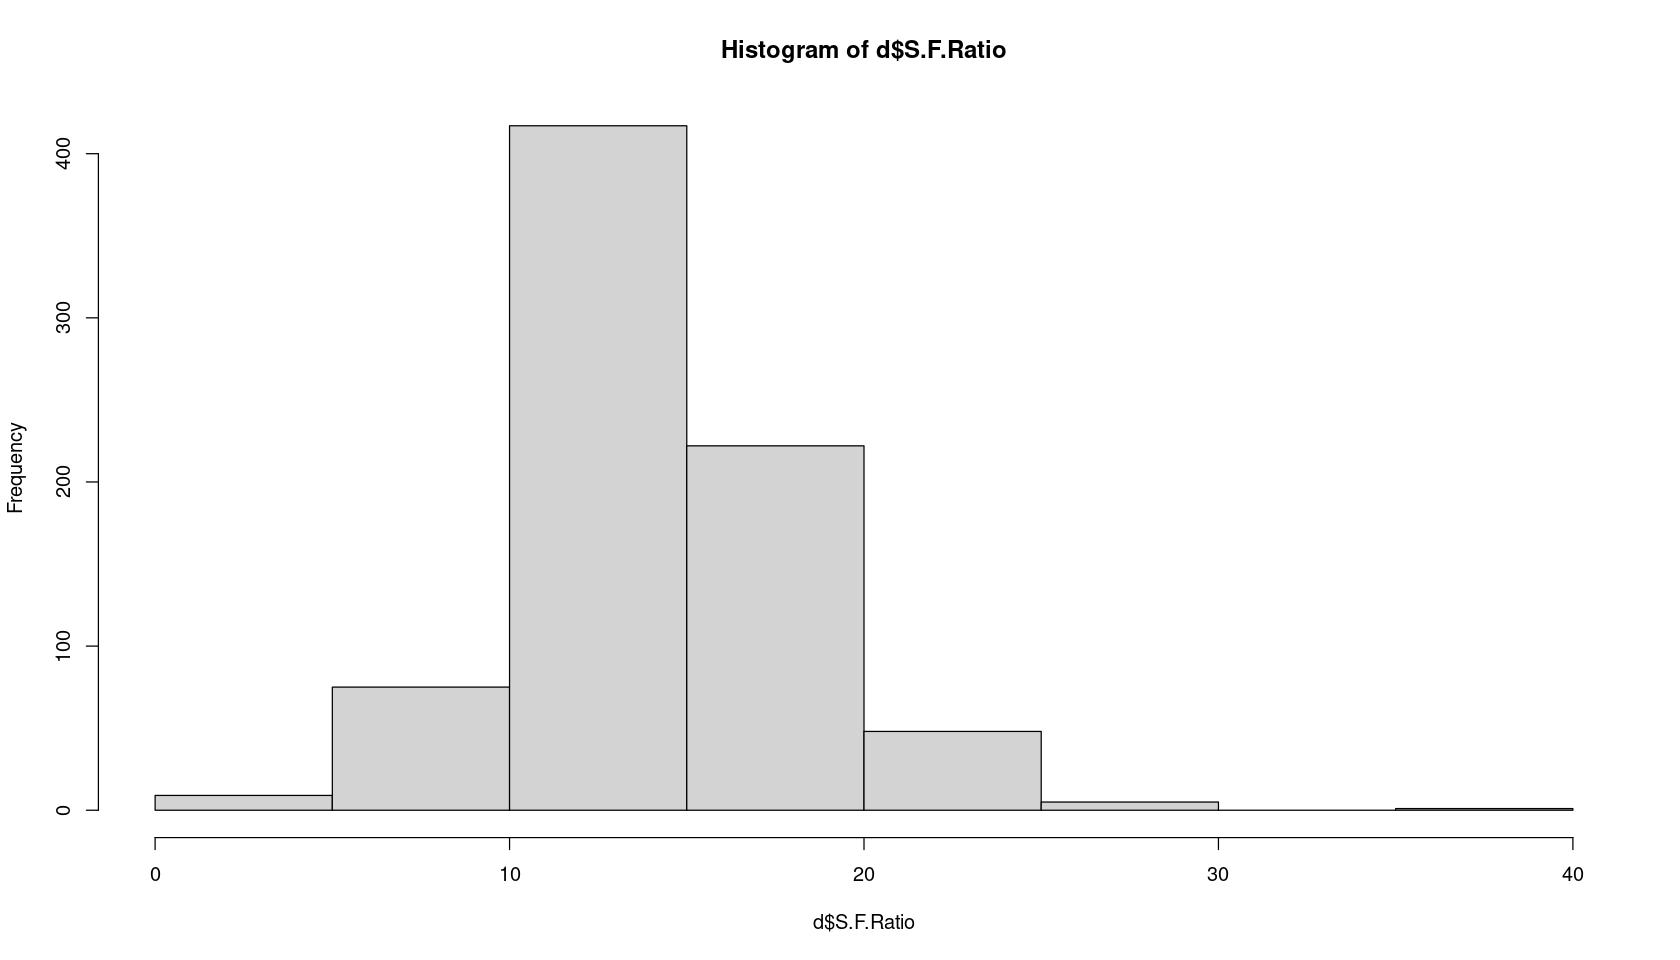

In [24]:
# S.F.Ratio
hist(d$S.F.Ratio)

- most values between 10-20
- light and long left tail
- light right tail
- resembles gaussian distribution

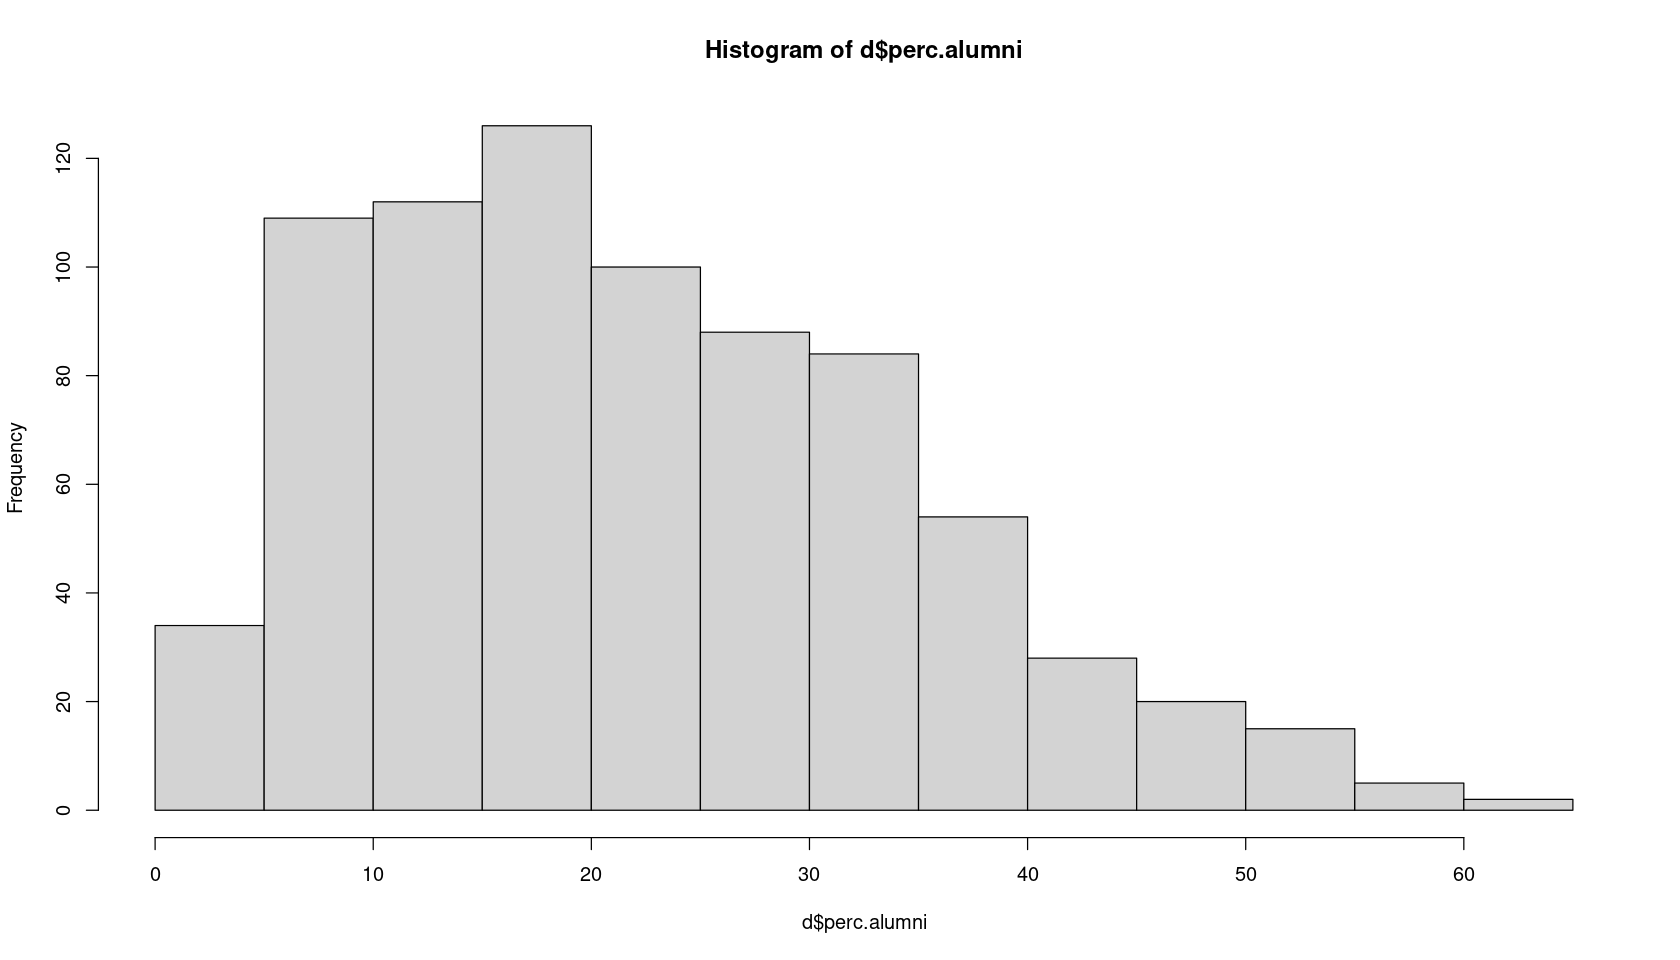

In [26]:
# perc.alumni
hist(d$perc.alumni)

- right skewed
- long and light left tail
- relatively flat around the highest frequency part

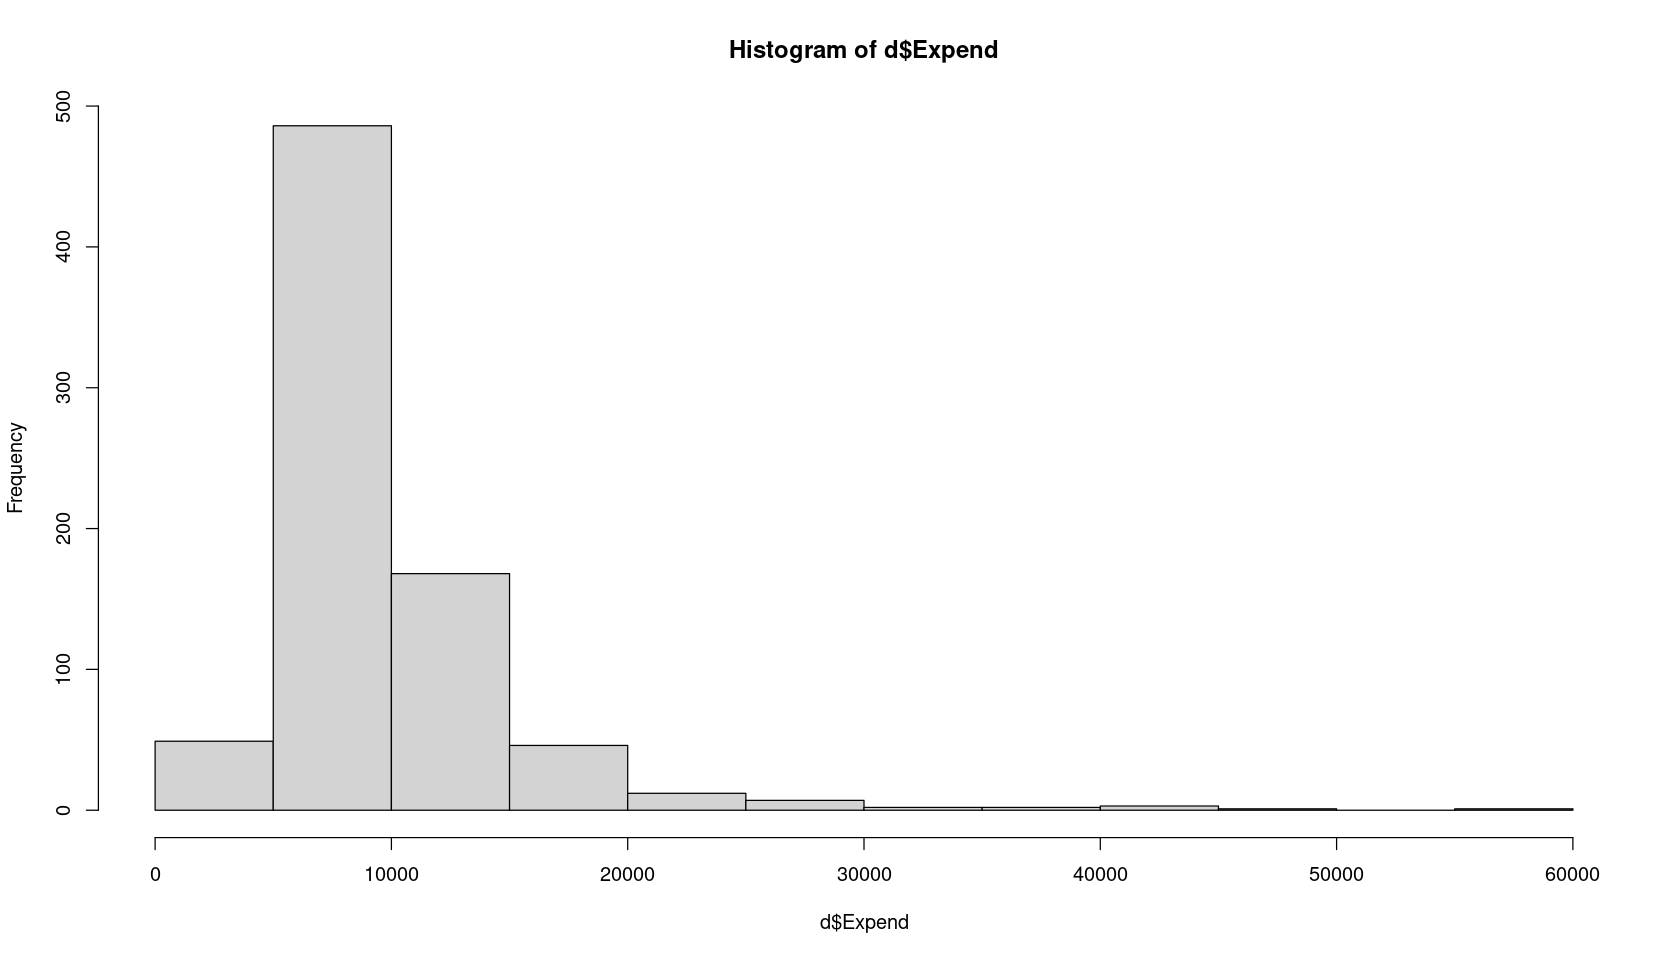

In [27]:
# Expend
hist(d$Expend)

- very right skewed
- very long left tail
- most values around 10000
- resembles gamma distribution

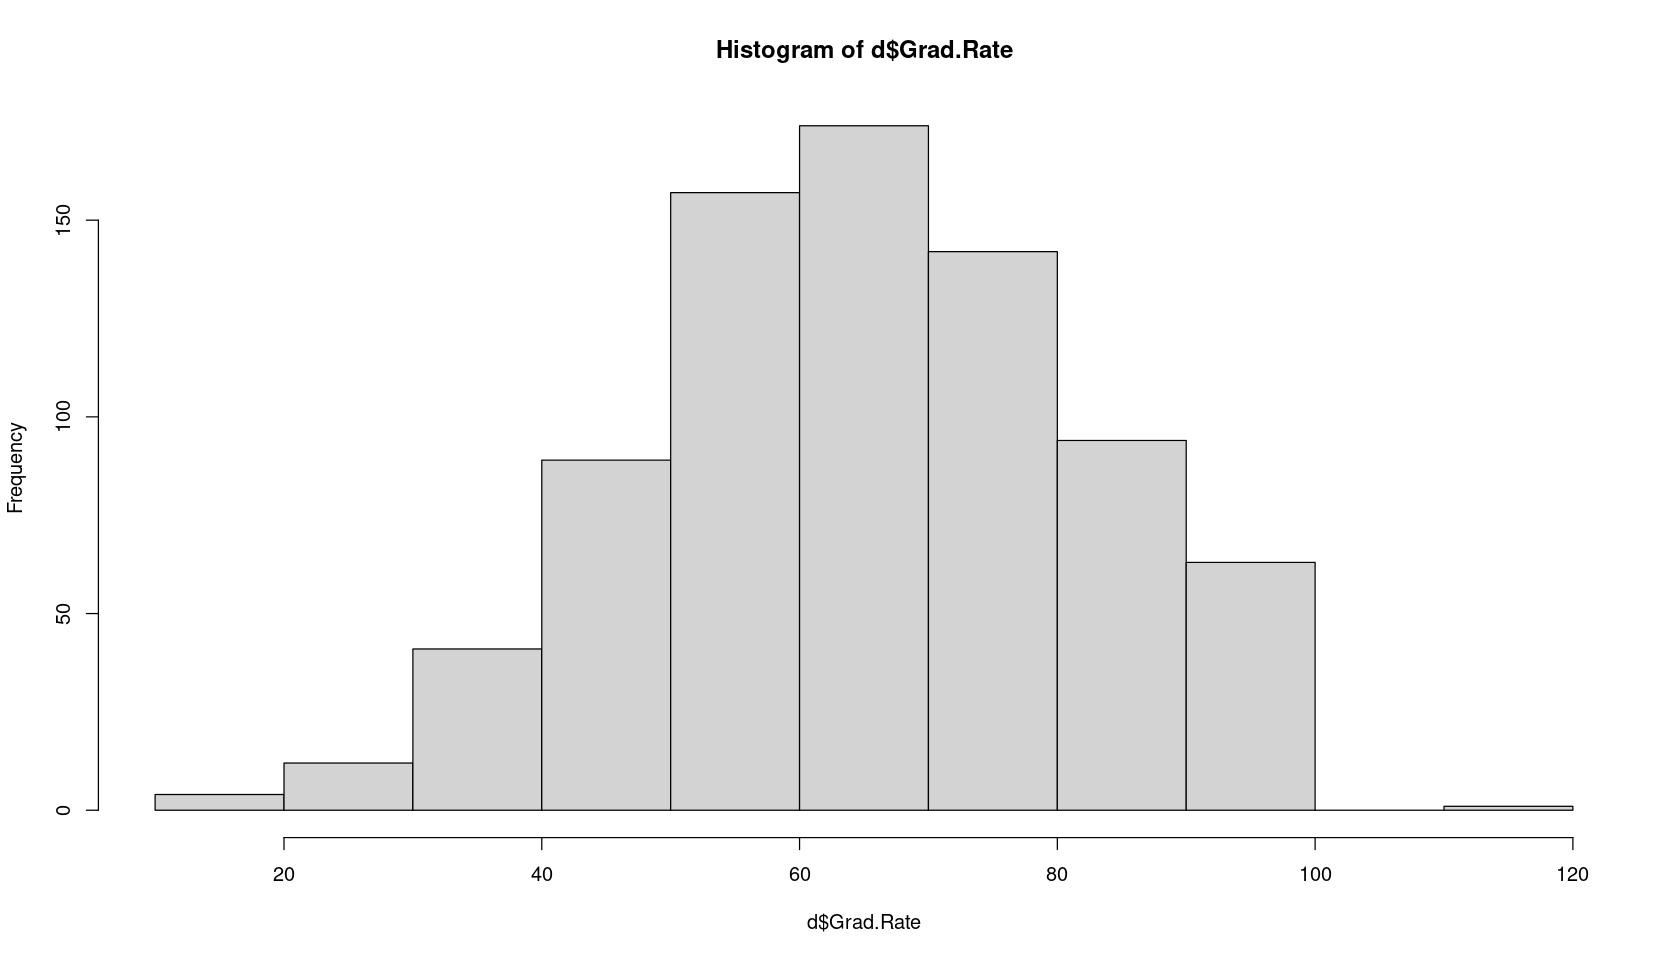

In [28]:
# Grad.Rate
hist(d$Grad.Rate)

- quite resembles a gaussian distribution with mean between 50-70
- light leftmost bin frequency

### Boxplots

In [33]:
# setting plot sizes
options(repr.plot.width = 18, repr.plot.height = 10)

In [49]:
# melt d dataframe
cols = colnames(d)[colnames(d) != 'X' & colnames(d) != 'Private']
d2 = melt(d, id.vars='X', measure.vars=cols)

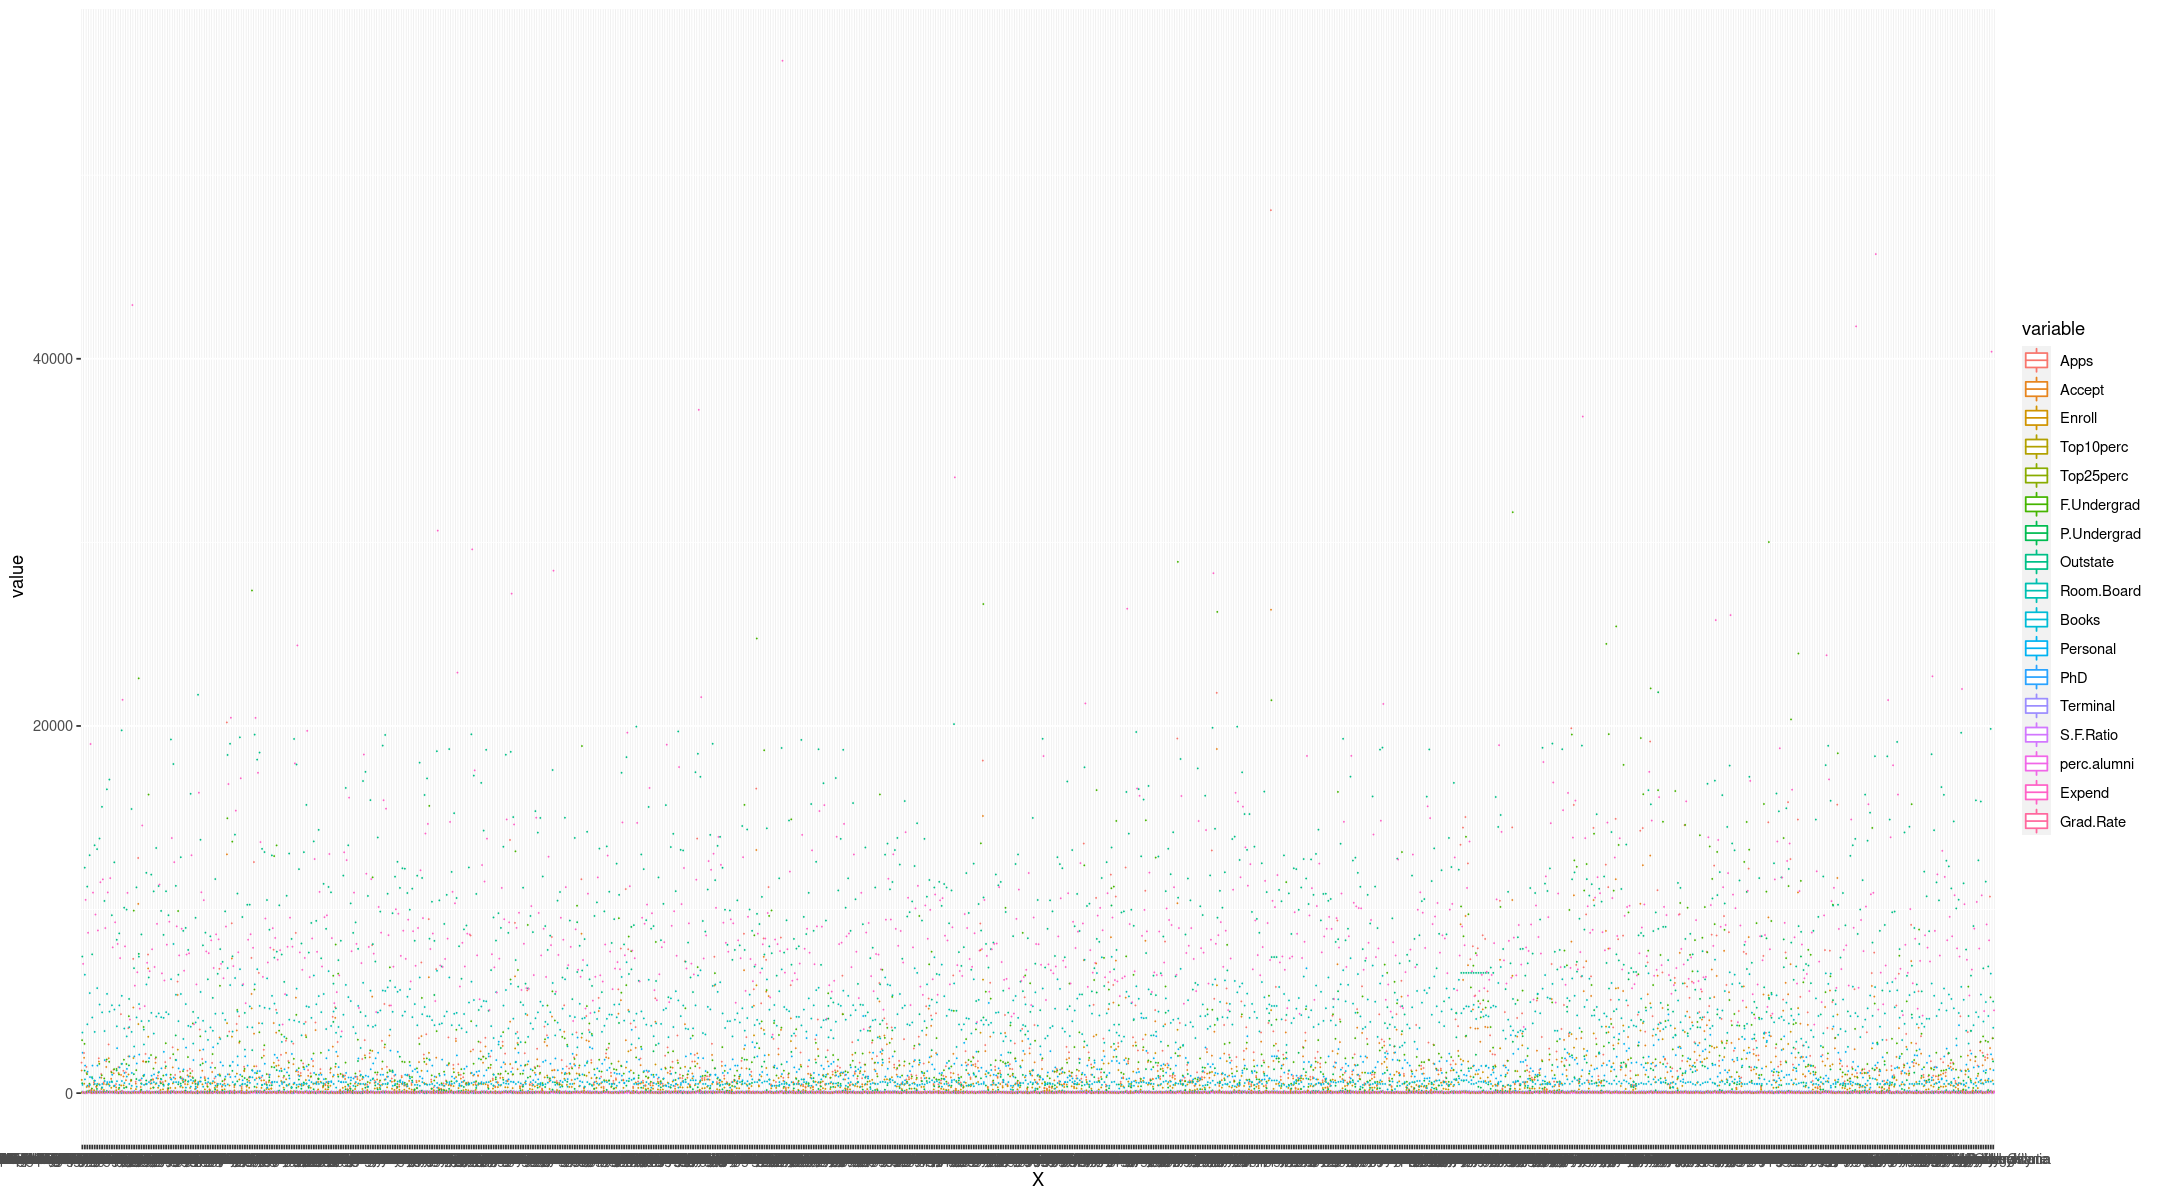

In [52]:
ggplot(d2) +
    geom_boxplot(aes(x=X, y=value, color=variable))